In [ ]:
# 데이터 불러오기
import pandas as pd
# 상위 폴더로 나가서 data 폴더 접근
df = pd.read_csv('../data/전처리된_데이터.csv')

In [ ]:
# 모델링 및 파이프라인 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 예시: 로지스틱 회귀 파이프라인
pipeline_lr = ImbPipeline([
    ('smote', SMOTE(random_state=42)),  # 불균형 처리
    ('model', LogisticRegression())     # 모델
])

In [ ]:
#학습 및 성능 비교 코드 작성 예정

In [ ]:
#최종 모델 저장 
import joblib
import os

# 폴더가 없으면 만드는 안전장치
os.makedirs('../models/ML', exist_ok=True)

# 모델 저장
joblib.dump(best_model, '../models/ML/final_ml_model.pkl')

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. 데이터 불러오기
file_path = "../data/processed/Customer_Churn_Dataset_0_impute_label.csv"
df = pd.read_csv(file_path)

# 2. 불필요한 컬럼 제거 (인덱스 컬럼 등)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# 3. 문제지(X)와 정답지(y) 나누기
target = 'Churn'  # 타겟 컬럼명 확인 필수
X = df.drop(columns=[target])
y = df[target]

# 4. 데이터 분할 (Train: 75%, Test: 25%)
# stratify=y 옵션은 이탈 고객의 비율을 유지하며 나누기 위해 필수입니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=0
)

# 잘 나뉘었는지 크기 확인
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (5282, 21)
X_test: (1761, 21)


In [86]:
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
tree = DecisionTreeClassifier(max_depth=5,class_weight='balanced')

# 학습
tree.fit(X_train, y_train)

# 추론
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
print("DecsionTree 정밀도(Precision) - 1기준")
print(f"Trainset : {precision_score(y_train, pred_train_tree)}, Testset: {precision_score(y_test, pred_test_tree)}")


DecsionTree 정밀도(Precision) - 1기준
Trainset : 0.6049149338374291, Testset: 0.5767634854771784


In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print("---------------train set Classification Report---------------")
print(classification_report(y_train, pred_train_tree))

---------------train set Classification Report---------------
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      3880
           1       0.60      0.91      0.73      1402

    accuracy                           0.82      5282
   macro avg       0.78      0.85      0.80      5282
weighted avg       0.87      0.82      0.83      5282



In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print("---------------test set Classification Report---------------")
print(classification_report(y_test, pred_test_tree))

---------------test set Classification Report---------------
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      1294
           1       0.58      0.89      0.70       467

    accuracy                           0.80      1761
   macro avg       0.76      0.83      0.77      1761
weighted avg       0.85      0.80      0.81      1761



In [90]:
tree.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.48704567e-01, 0.00000000e+00, 0.00000000e+00, 4.77834859e-02,
       5.62522342e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.40434692e-02, 0.00000000e+00, 4.15582902e-01, 0.00000000e+00,
       1.07667181e-16, 3.58706792e-02, 6.87560575e-03, 0.00000000e+00,
       2.74887057e-01])

In [91]:
fi = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)
fi

Contract            4.155829e-01
numTechTickets      2.748871e-01
tenure              1.487046e-01
OnlineSecurity      5.625223e-02
InternetService     4.778349e-02
MonthlyCharges      3.587068e-02
StreamingTV         1.404347e-02
TotalCharges        6.875606e-03
PaymentMethod       1.076672e-16
Dependents          0.000000e+00
Partner             0.000000e+00
SeniorCitizen       0.000000e+00
gender              0.000000e+00
TechSupport         0.000000e+00
DeviceProtection    0.000000e+00
OnlineBackup        0.000000e+00
PhoneService        0.000000e+00
MultipleLines       0.000000e+00
StreamingMovies     0.000000e+00
PaperlessBilling    0.000000e+00
numAdminTickets     0.000000e+00
dtype: float64

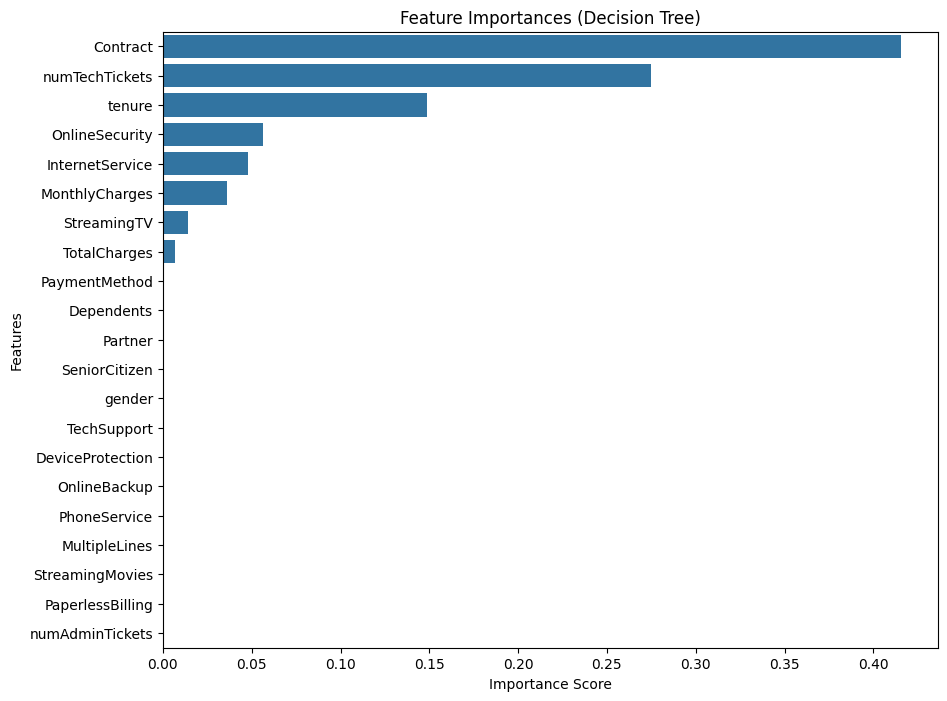

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 중요도와 변수명을 묶어서 데이터프레임 만들기
# (rf_model 대신 사용하신 모델 변수명을 넣으세요. 예: rf, tree 등)
importances = tree.feature_importances_
feature_names = X_train.columns

# 보기 좋게 정렬하기 위해 Series로 변환
ft_series = pd.Series(importances, index=feature_names)
ft_series = ft_series.sort_values(ascending=False)  # 내림차순 정렬

# 2. 시각화 그리기
plt.figure(figsize=(10, 8))  # 그림 사이즈 조절 (가로, 세로)
plt.title("Feature Importances (Decision Tree)")

# seaborn을 이용해 가로 막대 그래프 그리기
sns.barplot(x=ft_series, y=ft_series.index)

# 라벨 달기
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## 랜덤 포레스트


In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. 데이터 불러오기
file_path = "../data/processed/Customer_Churn_Dataset_0_impute_onehot.csv"
df = pd.read_csv(file_path)

# 2. 불필요한 컬럼 제거 (인덱스 컬럼 등)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# 3. 문제지(X)와 정답지(y) 나누기
target = 'Churn_1'  # 타겟 컬럼명 확인 필수
X = df.drop(columns=[target])
y = df[target]

# 4. 데이터 분할 (Train: 75%, Test: 25%)
# stratify=y 옵션은 이탈 고객의 비율을 유지하며 나누기 위해 필수입니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=0
)

# 잘 나뉘었는지 크기 확인
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


X_train: (5282, 32)
X_test: (1761, 32)


In [144]:
###### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 모델 생성
rfc = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0)

# 학습
rfc.fit(X_train, y_train)

## 추론
pred_train_rfc = rfc.predict(X_train)
pred_test_rfc =  rfc.predict(X_test)


In [145]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm_train_rfc = confusion_matrix(y_train, pred_train_rfc)
cm_train_rfc

array([[3640,  240],
       [ 473,  929]])

In [146]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

print("RandomForest 정밀도(Precision) - 1기준")
print(f"Trainset : {precision_score(y_train, pred_train_rfc):.4f}, Testset: {precision_score(y_test, pred_test_rfc):.4f}")

RandomForest 정밀도(Precision) - 1기준
Trainset : 0.7947, Testset: 0.7391


In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print("---------------train set Classification Report---------------")
print(classification_report(y_train, pred_train_rfc))

---------------train set Classification Report---------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3880
           1       0.79      0.66      0.72      1402

    accuracy                           0.87      5282
   macro avg       0.84      0.80      0.82      5282
weighted avg       0.86      0.87      0.86      5282



In [148]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print("---------------test set Classification Report---------------")
print(classification_report(y_test, pred_test_rfc))

---------------test set Classification Report---------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1294
           1       0.74      0.66      0.69       467

    accuracy                           0.85      1761
   macro avg       0.81      0.79      0.80      1761
weighted avg       0.84      0.85      0.84      1761



In [149]:
rfc.feature_importances_

array([0.00615369, 0.15864744, 0.05285075, 0.10155916, 0.00349291,
       0.24540373, 0.00191567, 0.00588174, 0.00395949, 0.00119975,
       0.00402538, 0.00170225, 0.01779577, 0.06522891, 0.02384104,
       0.01560875, 0.0105463 , 0.01000625, 0.00748794, 0.01658872,
       0.01936036, 0.01235315, 0.00354111, 0.02074337, 0.0051722 ,
       0.01734245, 0.03619096, 0.0663011 , 0.01091964, 0.00236061,
       0.04977851, 0.00204091])

In [150]:
fi = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
fi

numTechTickets                           0.245404
tenure                                   0.158647
TotalCharges                             0.101559
Contract_Two year                        0.066301
InternetService_Fiber optic              0.065229
MonthlyCharges                           0.052851
PaymentMethod_Electronic check           0.049779
Contract_One year                        0.036191
OnlineSecurity_1.0                       0.023841
StreamingTV_No internet service          0.020743
TechSupport_1.0                          0.019360
InternetService_DSL                      0.017796
StreamingMovies_No internet service      0.017342
DeviceProtection_No internet service     0.016589
OnlineSecurity_No internet service       0.015609
TechSupport_No internet service          0.012353
PaperlessBilling_1                       0.010920
OnlineBackup_1.0                         0.010546
OnlineBackup_No internet service         0.010006
DeviceProtection_1.0                     0.007488


In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. 제거할 변수 목록 (아까 확인한 하위 10개)
# 이 변수들은 중요도가 매우 낮아(0.5% 미만) 제거해도 영향이 적을 것으로 예상됩니다.
drop_features = [
    'PhoneService_1', 
    'MultipleLines_No phone service', 
    'gender_1', 
    'PaymentMethod_Mailed check', 
    'PaymentMethod_Credit card (automatic)', 
    'numAdminTickets', 
    'StreamingTV_1.0', 
    'Dependents_1', 
    'MultipleLines_1.0', 
    'StreamingMovies_1.0'
]

# 2. 데이터에서 해당 컬럼 제거 (원본 보존을 위해 새로운 변수에 저장)
# errors='ignore': 만약 리스트에 없는 컬럼이 있어도 에러 내지 말고 넘어가라는 뜻
X_train_new = X_train.drop(columns=drop_features, errors='ignore')
X_test_new = X_test.drop(columns=drop_features, errors='ignore')

print(f"변수 제거 전 컬럼 수: {X_train.shape[1]}개")
print(f"변수 제거 후 컬럼 수: {X_train_new.shape[1]}개")
print("-" * 30)

# 3. 모델 재학습 (줄어든 데이터로)
# 기존과 공정한 비교를 위해 파라미터(n_estimators, max_depth)는 똑같이 유지합니다.
rfc_new = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0)
rfc_new.fit(X_train_new, y_train)

# 4. 성능 평가
pred_test_new = rfc_new.predict(X_test_new)
acc_new = accuracy_score(y_test, pred_test_new)

print(f"기존 모델 정확도: 0.8472 (약 84.7%)") # 아까 나온 수치
print(f"New  모델 정확도: {acc_new:.4f}")

print("\n[New 모델 상세 리포트]")
print(classification_report(y_test, pred_test_new))

변수 제거 전 컬럼 수: 32개
변수 제거 후 컬럼 수: 22개
------------------------------
기존 모델 정확도: 0.8472 (약 84.7%)
New  모델 정확도: 0.8541

[New 모델 상세 리포트]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1294
           1       0.75      0.68      0.71       467

    accuracy                           0.85      1761
   macro avg       0.82      0.80      0.81      1761
weighted avg       0.85      0.85      0.85      1761



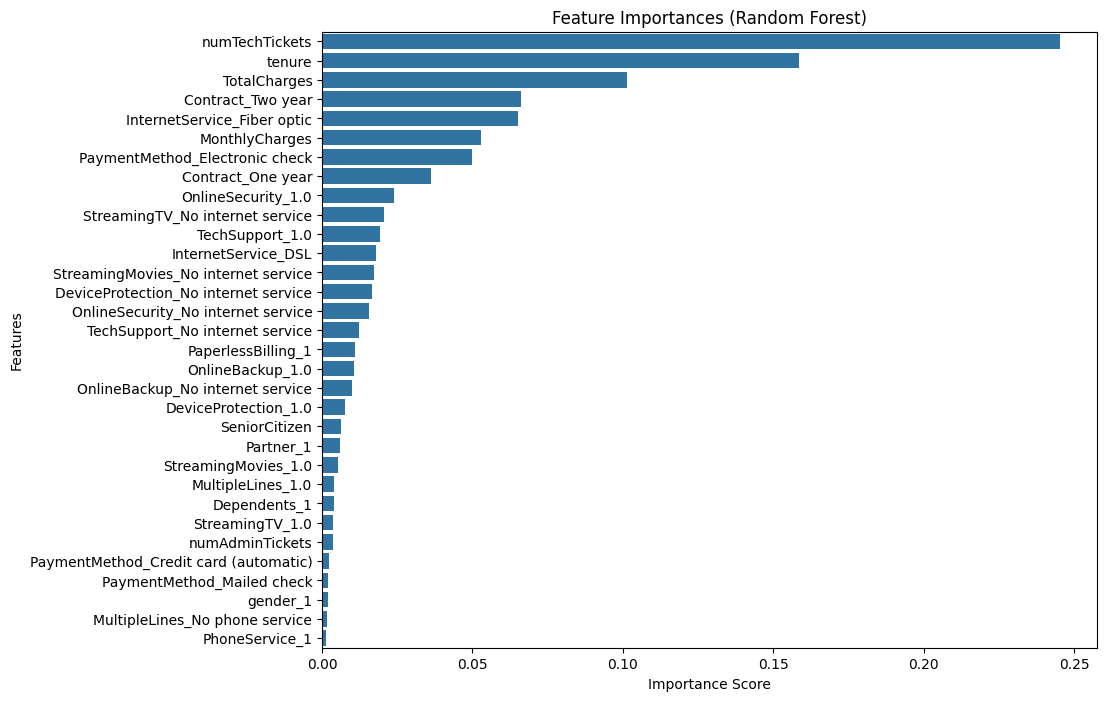

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 중요도와 변수명을 묶어서 데이터프레임 만들기
# (rf_model 대신 사용하신 모델 변수명을 넣으세요. 예: rf, tree 등)
importances = rfc.feature_importances_
feature_names = X_train.columns

# 보기 좋게 정렬하기 위해 Series로 변환
ft_series = pd.Series(importances, index=feature_names)
ft_series = ft_series.sort_values(ascending=False)  # 내림차순 정렬

# 2. 시각화 그리기
plt.figure(figsize=(10, 8))  # 그림 사이즈 조절 (가로, 세로)
plt.title("Feature Importances (Random Forest)")

# seaborn을 이용해 가로 막대 그래프 그리기
sns.barplot(x=ft_series, y=ft_series.index)

# 라벨 달기
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [153]:
from sklearn.inspection import permutation_importance

# 모델, 평가용 데이터(X_test, y_test)를 넣으면 됩니다.
# n_repeats=10: 10번 섞어서 평균을 냄 (더 정확해짐)
result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=42)

# 중요도 순서대로 출력하기
import pandas as pd
perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_importance_df.head(10))

                                Feature  Importance
5                        numTechTickets    0.068711
1                                tenure    0.031743
27                    Contract_Two year    0.013288
3                          TotalCharges    0.010108
13          InternetService_Fiber optic    0.007666
26                    Contract_One year    0.001249
8                          Dependents_1    0.001193
23      StreamingTV_No internet service    0.000738
25  StreamingMovies_No internet service    0.000454
15   OnlineSecurity_No internet service    0.000454


In [154]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# 1. 데이터 로드 및 준비
file_path = "../data/processed/Customer_Churn_Dataset_0_impute_onehot.csv"
df = pd.read_csv(file_path)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

target = 'Churn_1'
X = df.drop(columns=[target])
y = df[target]

# 2. 교차 검증 설정 (5-Fold)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)

importances_list = []  # 각 Fold의 결과를 저장할 리스트

print("교차 검증 시작 (총 5회 진행)...")

# 3. 반복문으로 5번 학습 및 평가
for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
    # 데이터 나누기
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # 모델 학습
    rfc.fit(X_train_fold, y_train_fold)
    
    # ★ 핵심: 검증 세트(Val)로 순열 중요도 계산
    result = permutation_importance(
        rfc, X_val_fold, y_val_fold, n_repeats=5, random_state=42, n_jobs=-1
    )
    
    importances_list.append(result.importances_mean)
    print(f"Fold {fold+1} 완료")

# 4. 결과 평균 내기
mean_importances = np.mean(importances_list, axis=0)
std_importances = np.std(importances_list, axis=0) # 표준편차(변동폭)

# 5. 보기 좋게 정리
cv_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Mean': mean_importances,
    'Importance_Std': std_importances
}).sort_values(by='Importance_Mean', ascending=False)

print("\n[교차 검증을 거친 최종 중요도 Top 10]")
print(cv_importance_df.head(10))

교차 검증 시작 (총 5회 진행)...
Fold 1 완료
Fold 2 완료
Fold 3 완료
Fold 4 완료
Fold 5 완료

[교차 검증을 거친 최종 중요도 Top 10]
                                 Feature  Importance_Mean  Importance_Std
5                         numTechTickets         0.074314        0.006212
1                                 tenure         0.029702        0.007845
3                           TotalCharges         0.012749        0.004237
27                     Contract_Two year         0.011700        0.002374
13           InternetService_Fiber optic         0.005254        0.005705
26                     Contract_One year         0.002186        0.002103
17      OnlineBackup_No internet service         0.001618        0.001272
14                    OnlineSecurity_1.0         0.001618        0.003703
21       TechSupport_No internet service         0.001477        0.000945
19  DeviceProtection_No internet service         0.001136        0.001086


In [155]:
# 파이팅 !!! 아자아자